In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [5]:

# Assuming you have your dataset in folders named 'train', 'test', and 'val', and
# each folder contains subfolders named after class labels (here, person's names)

# Directory paths
train_dir = r'D:\thesis\filtered train'
val_dir = r'D:\thesis\filtered validation'
test_dir = r'D:\thesis\filtered test'

# Image data generator with preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load and preprocess images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical')

# Output the number of classes (people) in the dataset
num_classes = train_generator.num_classes
print(f"Number of classes: {num_classes}")

Found 3014 images belonging to 334 classes.
Found 680 images belonging to 334 classes.
Found 673 images belonging to 334 classes.
Number of classes: 334


In [4]:
# Load InceptionV3 model pre-trained on ImageNet data
base_model = InceptionV3(weights='imagenet', include_top=False)

In [5]:
# Add new layers on top for face recognition
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Large Dense layer
predictions = Dense(num_classes, activation='softmax')(
    x)  # num_classes is the number of people

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base InceptionV3 model
for layer in base_model.layers:
    layer.trainable = False

In [7]:
# Define your learning rate
learning_rate = 0.0001

# Create the RMSprop optimizer with the specified learning rate
optimizer = RMSprop(learning_rate=learning_rate)

# Compile the model with the custom optimizer
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/50
100/100 [==============================] - 27s 211ms/step - loss: 5.7942 - accuracy: 0.0137 - val_loss: 5.5177 - val_accuracy: 0.0312
Epoch 2/50
100/100 [==============================] - 20s 202ms/step - loss: 5.3185 - accuracy: 0.0719 - val_loss: 5.0797 - val_accuracy: 0.0781
Epoch 3/50
100/100 [==============================] - 21s 209ms/step - loss: 4.8198 - accuracy: 0.1289 - val_loss: 4.6851 - val_accuracy: 0.1272
Epoch 4/50
100/100 [==============================] - 19s 193ms/step - loss: 4.3584 - accuracy: 0.2132 - val_loss: 4.2694 - val_accuracy: 0.2076
Epoch 5/50
100/100 [==============================] - 19s 191ms/step - loss: 3.8721 - accuracy: 0.3333 - val_loss: 3.9108 - val_accuracy: 0.2790
Epoch 6/50
100/100 [==============================] - 19s 192ms/step - loss: 3.4696 - accuracy: 0.4075 - val_loss: 3.6198 - val_accuracy: 0.2991
Epoch 7/50
100/100 [==============================] - 19s 193ms/step - loss: 3.1391 - accuracy: 0.4761 - val_loss: 3.2800 - val_ac

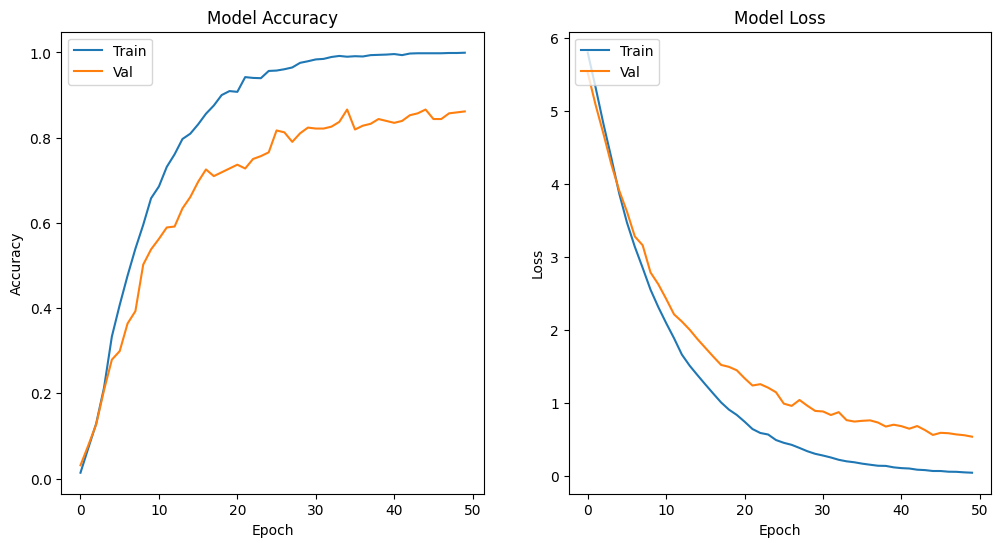

In [8]:
import matplotlib.pyplot as plt


# Train the model (adjust epochs and steps_per_epoch as needed)
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # depends on your data
    epochs=50,  # can be adjusted
    validation_data=val_generator,
    validation_steps=28)  # depends on your data

model.save('my_inception1.h5')


# Evaluate the model
eval_result = model.evaluate(test_generator)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

In [9]:
val_accuracy = history.history['val_accuracy'][-1]
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.8616071343421936


In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

# Generate predictions for the test set
test_generator.reset()  # Resetting the generator to avoid shuffling issues
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calculate F1 score, precision and recall
f1 = f1_score(true_classes, predicted_classes, average='macro')
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Optional: Print a full classification report
print("\nFull Classification Report:")
print(classification_report(true_classes,
      predicted_classes, target_names=class_labels))

NameError: name 'model' is not defined